# Tải các thư viện cần thiết

In [ ]:
!pip install bs4
!pip install lxml
!pip install html5lib
!pip install requests

  Preparing metadata (setup.py) ... done
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1256 sha256=da5e7aaed223d60b8abac581b98344229ba33d30e9a5568f608bbc1f12103cc5
  Stored in directory: /root/.cache/pip/wheels/25/42/45/b773edc52acb16cd2db4cf1a0b47117e2f69bb4eb300ed0e70
Successfully built bs4


# Lấy raw data html

# Lấy lịch thi đấu hoặc kết quả thi đấu ngoại hạng anh theo ngày mong muốn

In [ ]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
day = str(input('Nhập ngày thi đấu: '))
month = str(input('Nhập tháng thi đấu: '))
year = str(input('Nhập năm thi đấu: '))
url_time = year + month + day
schedule_URL = f'https://www.cbssports.com/soccer/premier-league/schedule/{url_time}'
schedule_HTML = requests.get(schedule_URL,verify=False)
soup = BeautifulSoup(schedule_HTML.text, "html.parser")
#Lấy các đội thi đấu - Khó khăn là phải chia ra 2 team đấu với nhau
try:
  teams = soup.find_all("span", class_ = 'TeamName')
  lst_team1 = []
  lst_team2 = []
  for i in range(len(teams)):
    if i%2 == 1:
      team1 = teams[i].text
      team1 = team1.strip()
      lst_team1.append(team1)
    else:
      team2 = teams[i].text
      team2 = team2.strip()
      lst_team2.append(team2)
except:
  pass
#lấy ngày thi đấu
try:
  times = soup.find_all("div", class_="CellGame")
  day = soup.find("h4")
  day = day.text
  day = day.strip()
except:
  pass

#Lấy thời gian thi đấu của các trận đấu - khó khăn là phải xử lý chuỗi đi kèm tên kênh tv
try:
  lst_times = []
  for i in times:
    mtch_time = i.text
    mtch_time = mtch_time.strip()
    mtch_time = mtch_time.strip('TELE')
    mtch_time = mtch_time.strip('PEAC')
    mtch_time = mtch_time.strip('NBCU')
    mtch_time = mtch_time.strip('NBCS')
    mtch_time = mtch_time.strip()
    lst_times.append(mtch_time)
except:
  pass

#Lấy sân thi đấu trận đó - khó khăn là dòng đó không có class cụ thể
try:
  stadiums = soup.find_all('td',class_ = 'TableBase-bodyTd')
  lst_stadiums = []
  for i in range(4,len(stadiums),5):
    stadium = stadiums[i].text
    stadium = stadium.strip()
    lst_stadiums.append(stadium)
except:
  pass

#Tạo điều kiện để xác định xem trận đó đã đá hay chưa hoặc ngày hôm đó không đá
try:
  test = soup.find_all("th", class_ = 'TableBase-headTh')
  test = test[2].text
  test = test.strip()
  if test == 'Time/TV':
    dfSchedule = pd.DataFrame({'Date': day,'Team_1': lst_team1,'Time': lst_times,'Team_2': lst_team2,'Stadium':lst_stadiums})
  else:
    dfSchedule = pd.DataFrame({'Date': day,'Team_1': lst_team1,'Result': lst_times,'Team_2': lst_team2})
except:
  print('Không có trận đấu nào vào ngày này')

Nhập ngày thi đấu: 11
Nhập tháng thi đấu: 11
Nhập năm thi đấu: 2023


/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1100: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.cbssports.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1100: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.cbssports.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [ ]:
dfSchedule

,Date,Team_1,Time,Team_2,Stadium
0,"Saturday, November 11, 2023",Tottenham Hotspur,7:30 am,Wolverhampton,Molineux
1,"Saturday, November 11, 2023",Burnley,10:00 am,Arsenal,Emirates Stadium
2,"Saturday, November 11, 2023",Luton Town,10:00 am,Manchester United,Old Trafford
3,"Saturday, November 11, 2023",Everton,10:00 am,Crystal Palace,Selhurst Park
4,"Saturday, November 11, 2023",Newcastle United,12:30 pm,Bournemouth,Vitality Stadium


**Do đây là lịch bóng đá lấy từ nguồn bên Mỹ nên múi giờ bị lệch (+11 tiếng) ra giờ việt nam**

In [ ]:
pip install folium

In [ ]:
import random
import folium


def random_marker_color():
    colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightred', 'beige', 'darkblue', 'darkgreen',
              'cadetblue', 'darkpurple', 'pink', 'lightblue', 'lightgreen', 'gray', 'black', 'lightgray']
    return random.choice(colors)
#Hàm random màu

def chamDiaDiem(map,info,latTi,lonGi):
  folium.Marker([latTi,lonGi],popup = info,icon = folium.Icon(icon = 'home',color = random_marker_color())).add_to(map)
#Hàm chấm điểm

In [ ]:
import folium
from geopy.geocoders import ArcGIS

#Tạo bảng đồ nước Anh
England_map = folium.Map(location=[52.3555177,-1.1743197],
                        zoom_start=6)

#Lấy tọa độ của các sân vận động
geolocator = ArcGIS()
lst_coordinates = []
lst_stadium_name = dfSchedule['Stadium'].tolist()
for staname in lst_stadium_name:
  stadium = geolocator.geocode(staname)
  stadium_lat = stadium.latitude
  stadium_long = stadium.longitude
  lst_coordinates.append([stadium_lat,stadium_long])

#Tạo info cho các địa điểm
lst_t1 = dfSchedule['Team_1'].tolist()
lst_t2 = dfSchedule['Team_2'].tolist()
lst_mtchtime  = dfSchedule['Time'].tolist()
lst_info = []
for t in range(len(lst_t1)):
  info = f'{day} - {lst_t1[t]} VS {lst_t2[t]} ({lst_mtchtime[t]})'
  lst_info.append(info)

#Chấm điểm theo tọa độ
for i in range(len(lst_coordinates)):
  chamDiaDiem(England_map,lst_info[i],lst_coordinates[i][0],lst_coordinates[i][1])

England_map

**Note: các trận đã đá xong thì web này không còn data về sân vận động đã đá**

# Lấy bảng xếp hạng Premier League

In [ ]:
import requests
from bs4 import BeautifulSoup
standingUrl = 'https://fbref.com/en/comps/9/Premier-League-Stats'
html=requests.get(standingUrl,verify=False)
soup = BeautifulSoup(html.text, "html.parser")

/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1100: InsecureRequestWarning: Unverified HTTPS request is being made to host 'fbref.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [ ]:
import pandas as pd
standing = pd.read_html(standingUrl, match='Regular season')
dfstanding = standing[0]
dfstanding.head(20)

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper,Notes
0,1,Tottenham,10,8,2,0,22,9,13,26,2.6,17.6,12.4,5.2,0.52,D W W W W,61726,Son Heung-min - 8,Guglielmo Vicario,NaN
1,2,Arsenal,10,7,3,0,23,8,15,24,2.4,18.6,7.9,10.7,1.07,D W W D W,60113,Eddie Nketiah - 5,David Raya,NaN
2,3,Manchester City,10,8,0,2,22,7,15,24,2.4,19.6,7.2,12.4,1.24,W L L W W,39945,Erling Haaland - 11,Ederson,NaN
3,4,Liverpool,10,7,2,1,23,9,14,23,2.3,22.3,12.1,10.2,1.02,W L D W W,50747,Mohamed Salah - 8,Alisson,NaN
4,5,Aston Villa,10,7,1,2,26,14,12,22,2.2,19.3,14.6,4.7,0.47,W W D W W,41332,"Ollie Watkins, Douglas Luiz - 5",Emiliano Martínez,NaN
5,6,Newcastle Utd,10,5,2,3,26,11,15,17,1.7,21.9,10.2,11.6,1.16,W W D W D,51993,Callum Wilson - 7,Nick Pope,NaN
6,7,Brighton,10,5,2,3,23,19,4,17,1.7,18.7,15.2,3.5,0.35,W L D L D,31653,Evan Ferguson - 5,Jason Steele,NaN
7,8,Manchester Utd,10,5,0,5,11,16,-5,15,1.5,14.7,17.5,-2.8,-0.28,W L W W L,73488,Scott McTominay - 3,André Onana,NaN
8,9,West Ham,10,4,2,4,16,17,-1,14,1.4,14.0,19.1,-5.1,-0.51,L W D L L,62465,Jarrod Bowen - 6,Alphonse Areola,NaN
9,10,Brentford,10,3,4,3,16,12,4,13,1.3,19.0,12.8,6.2,0.62,L D L W W,17009,Bryan Mbeumo - 6,Mark Flekken,NaN


# Trực quan hóa và đếm cúp của đội bóng tôi yêu (Manchester United)

In [ ]:
ManU_URL = 'https://fbref.com/en/squads/19538871/history/Manchester-United-Stats-and-History' #nguồn tham khảo

Sử dụng soup lấy giới thiệu về data này

In [ ]:
html = requests.get(ManU_URL,verify=False)
soup = BeautifulSoup(html.text, "html.parser")

intro = soup.find(id = 'meta')
print(intro.find('h1').text)
for i in intro.find_all('p'):
  print(i.text)


/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1100: InsecureRequestWarning: Unverified HTTPS request is being made to host 'fbref.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(



Manchester United FC Stats and History

Team Names:  Manchester United, Newton Heath
Gender: Male
Affiliated Squads: Manchester United WFC (F), Manchester United FC U21 (M), Manchester United FC U23 (M)
Seasons: 99; 
  
    1892-1893 to 2023-2024
  
  
League Record:  1893-967-1080
First Place Finishes: 
  20 since 1892-1893
Please note that we currently do not cover all seasons, so the data may not be complete.


**Lấy kết quả giải trong nước**

In [ ]:
manU_Premier = pd.read_html(ManU_URL, match='Domestic Leagues Results') #đọc bảng trong html
dfManU_All = manU_Premier[0] #pandas đọc ra list nên chuyển về df
dfManU_Premier = dfManU_All[dfManU_All['Comp'] == '1. Premier League'] #bỏ các giải trước khi đổi tên premier league
dfManU_Premier.head() #hiển thị df

,Season,Squad,Country,Comp,LgRank,MP,W,D,L,GF,GA,GD,Pts,Attendance,Top Team Scorer,Goalkeeper,Notes
0,2023-2024,Manchester Utd,eng ENG,1. Premier League,8th,10.0,5.0,0.0,5.0,11.0,16.0,-5.0,15.0,73488.0,Scott McTominay - 3,André Onana,NaN
1,2022-2023,Manchester Utd,eng ENG,1. Premier League,3rd,38.0,23.0,6.0,9.0,58.0,43.0,15.0,75.0,73671.0,Marcus Rashford - 17,David de Gea,→ Champions League via league finish
2,2021-2022,Manchester Utd,eng ENG,1. Premier League,6th,38.0,16.0,10.0,12.0,57.0,57.0,0.0,58.0,73150.0,Cristiano Ronaldo - 18,David de Gea,→ Europa League via league finish
3,2020-2021,Manchester Utd,eng ENG,1. Premier League,2nd,38.0,21.0,11.0,6.0,73.0,44.0,29.0,74.0,526.0,Bruno Fernandes - 18,David de Gea,→ Champions League via league finish
4,2019-2020,Manchester Utd,eng ENG,1. Premier League,3rd,38.0,18.0,12.0,8.0,66.0,36.0,30.0,66.0,57415.0,"Anthony Martial, Marcus Rashford - 17",David de Gea,→ Champions League via league finish


phân tích các kiểu dữ liệu các cột để xử lý data

In [ ]:
dfManU_Premier.dtypes

Season              object
Squad               object
Country             object
Comp                object
LgRank              object
MP                 float64
W                  float64
D                  float64
L                  float64
GF                 float64
GA                 float64
GD                 float64
Pts                float64
Attendance         float64
Top Team Scorer     object
Goalkeeper          object
Notes               object
dtype: object

visualize các phong độ của Manchester United

In [ ]:
# lọc ra hàng đầu tiên vì năm 2023-2024 đang đá và lật ngược phục vụ cho vẽ biểu đồ
dfManU_PremierC = dfManU_Premier.iloc[1:, :]#bỏ năm 2023-2024
dfManU_PremierC = dfManU_PremierC.sort_index(ascending=False)#lật ngược

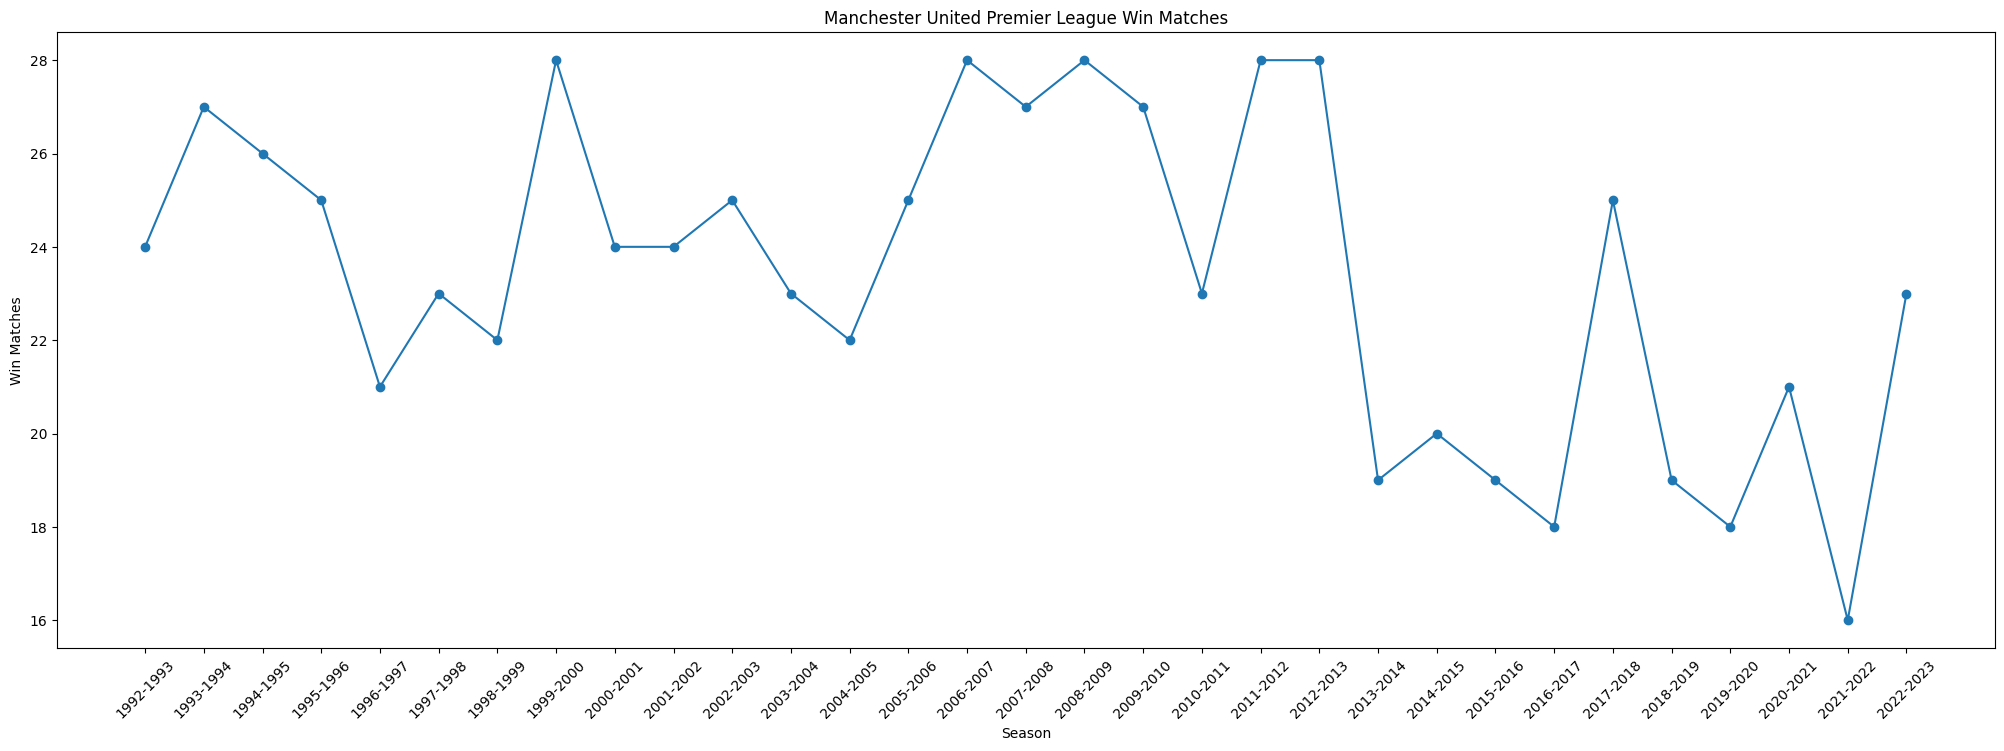

In [ ]:
import matplotlib.pyplot as plt

# Tạo biểu đồ đường để hiển thị thứ hạng
plt.plot(dfManU_PremierC['Season'], dfManU_PremierC['W'], marker='o')



# Đặt tiêu đề và nhãn cho biểu đồ
plt.title('Manchester United Premier League Win Matches')
plt.xlabel('Season')
plt.ylabel('Win Matches')

# Xoay nhãn trục x để đọc dễ dàng hơn
plt.xticks(rotation=45)

#custom biểu đồ
fig = plt.gcf()
fig.set_size_inches(25, 8)
ax=plt.subplot()

# Hiển thị biểu đồ
plt.show()

xử lý thứ hạng sang kiểu int

In [ ]:
dfManU_PremierC['LgRank'] = dfManU_Premier['LgRank'].str.extract('(\d+)').astype(int)

Vẽ biểu đồ thể hiện thứ hạng qua từng năm

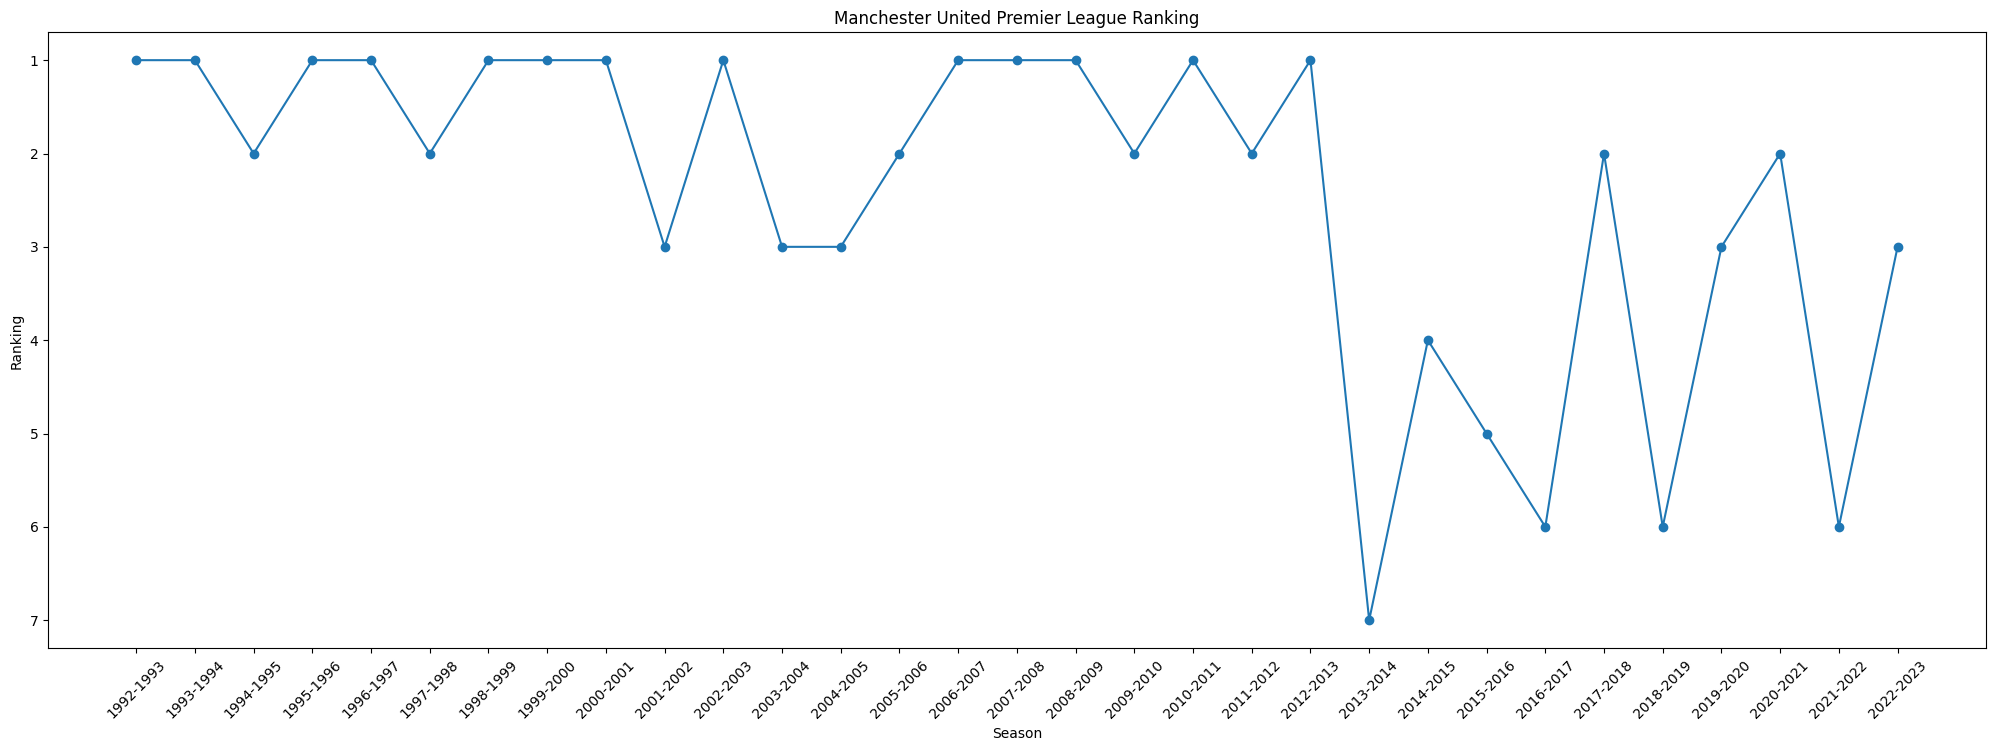

In [ ]:
import matplotlib.pyplot as plt

# Tạo biểu đồ đường để hiển thị thứ hạng
plt.plot(dfManU_PremierC['Season'], dfManU_PremierC['LgRank'], marker='o')

# Đảo ngược trục Y để giá trị thứ hạng hiển thị theo thứ tự từ cao đến thấp
plt.gca().invert_yaxis()

# Đặt tiêu đề và nhãn cho biểu đồ
plt.title('Manchester United Premier League Ranking')
plt.xlabel('Season')
plt.ylabel('Ranking')

# Xoay nhãn trục x để đọc dễ dàng hơn
plt.xticks(rotation=45)

#custom biểu đồ
fig = plt.gcf()
fig.set_size_inches(25, 8)
ax=plt.subplot()

# Hiển thị biểu đồ
plt.show()

từ thông tin trên chọn ra các năm mà Manchester United vô địch Premier League

In [ ]:
dfWin_Premier = dfManU_Premier.loc[dfManU_Premier['LgRank'] == '1st']
dfWin_Premier.head()

,Season,Squad,Country,Comp,LgRank,MP,W,D,L,GF,GA,GD,Pts,Attendance,Top Team Scorer,Goalkeeper,Notes
11,2012-2013,Manchester Utd,eng ENG,1. Premier League,1st,38.0,28.0,5.0,5.0,86.0,43.0,43.0,89.0,75530.0,Robin van Persie - 26,David de Gea,→ Champions League via league finish
13,2010-2011,Manchester Utd,eng ENG,1. Premier League,1st,38.0,23.0,11.0,4.0,78.0,37.0,41.0,80.0,75109.0,Dimitar Berbatov - 20,Edwin van der Sar,→ Champions League via league finish
15,2008-2009,Manchester Utd,eng ENG,1. Premier League,1st,38.0,28.0,6.0,4.0,68.0,24.0,44.0,90.0,75304.0,Cristiano Ronaldo - 18,Edwin van der Sar,→ Champions League via league finish
16,2007-2008,Manchester Utd,eng ENG,1. Premier League,1st,38.0,27.0,6.0,5.0,80.0,22.0,58.0,87.0,75691.0,Cristiano Ronaldo - 31,Edwin van der Sar,→ Champions League via Champions League win
17,2006-2007,Manchester Utd,eng ENG,1. Premier League,1st,38.0,28.0,5.0,5.0,83.0,27.0,56.0,89.0,75826.0,Cristiano Ronaldo - 17,Edwin van der Sar,→ Champions League via league finish


đếm cúp Premier League

In [ ]:
print(f'Số cúp Premier League mà MU có là: {dfWin_Premier.value_counts().sum()}')

Số cúp Premier League mà MU có là: 13


Code cơ bản xử lý string và so sánh tìm ra ai là người ghi bàn nhiều nhất trong một mùa trong lịch sử của MU

In [ ]:
bestplayer = None
hisgoals = 0
for i in dfManU_Premier['Top Team Scorer']:
  cutted = i.split('-')
  player = str(cutted[0]).strip()
  goal = int(cutted[1])
  if bestplayer == None and hisgoals ==0:
    bestplayer = player
    hisgoals = goal
  else:
    if goal <= hisgoals:
      continue
    else:
      bestplayer = player
      hisgoals = goal

print(f'Cầu thủ ghi được nhiều bàn nhất trong một mùa giải trong lịch sử MU ở Champion League là: {bestplayer} với số bàn thắng là: {hisgoals}')


Cầu thủ ghi được nhiều bàn nhất trong một mùa giải trong lịch sử MU ở Champion League là: Cristiano Ronaldo với số bàn thắng là: 31


**Lấy thông tin các giải quốc tế (chỉ lấy C1)**

In [ ]:
manU_International = pd.read_html(ManU_URL, match='International Cup Results')
dfManU_International = manU_International[0]
dfManU_C1 = dfManU_International[dfManU_International['Comp'] == '1. Champions Lg']
dfManU_C1.head()

,Season,Squad,Comp,LgRank,MP,W,D,L,GF,GA,GD,Pts,Attendance,Top Team Scorer,Goalkeeper,Notes
0,2023-2024,Manchester Utd,1. Champions Lg,GR,3.0,1.0,0.0,2.0,6.0,7.0,-1.0,3.0,73227.0,Rasmus Højlund - 3,André Onana,NaN
2,2021-2022,Manchester Utd,1. Champions Lg,R16,8.0,3.0,3.0,2.0,12.0,10.0,2.0,12.0,72893.0,Cristiano Ronaldo - 6,David de Gea,NaN
4,2020-2021,Manchester Utd,1. Champions Lg,GR,6.0,3.0,0.0,3.0,15.0,10.0,5.0,9.0,374.0,Marcus Rashford - 6,David de Gea,NaN
6,2018-2019,Manchester Utd,1. Champions Lg,QF,10.0,4.0,1.0,5.0,10.0,11.0,-1.0,13.0,73708.0,"Romelu Lukaku, Paul Pogba... - 2",David de Gea,NaN
7,2017-2018,Manchester Utd,1. Champions Lg,R16,8.0,5.0,1.0,2.0,13.0,5.0,8.0,16.0,74467.0,Romelu Lukaku - 5,David de Gea,NaN


xử lý rank từ chữ sang số cho dễ xử lý

In [ ]:
def rank_to_number(rank):
  if rank == 'W': # Vô địch
    return 1
  elif rank == 'F': #Á quân
    return 2
  elif rank == 'SF': #vô bán kết
    return 3
  elif rank == 'QF':#vô tứ kết
    return 4
  elif rank == 'R16':#vòng 16 đội
    return 5
  else: #hết cứu
    return 6

# Áp dụng hàm tùy chỉnh vào cột 'lgRank' để tạo một cột mới 'Rank_Number'
dfManU_C1['Rank_Number'] = dfManU_C1['LgRank'].apply(rank_to_number)

# In ra DataFrame sau khi thêm cột
#dfManU_C1

<ipython-input-21-f137971de0c0>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfManU_C1['Rank_Number'] = dfManU_C1['LgRank'].apply(rank_to_number)


vẽ biểu đồ thể hiện thành tích tại C1 của MU qua từng năm

In [ ]:
# lọc ra hàng đầu tiên vì năm 2023-2024 đang đá và lật ngược phục vụ cho vẽ biểu đồ
dfManU_C1 = dfManU_C1.iloc[1:, :]#bỏ năm 2023-2024
dfManU_C1 = dfManU_C1.sort_index(ascending=False)#lật ngược

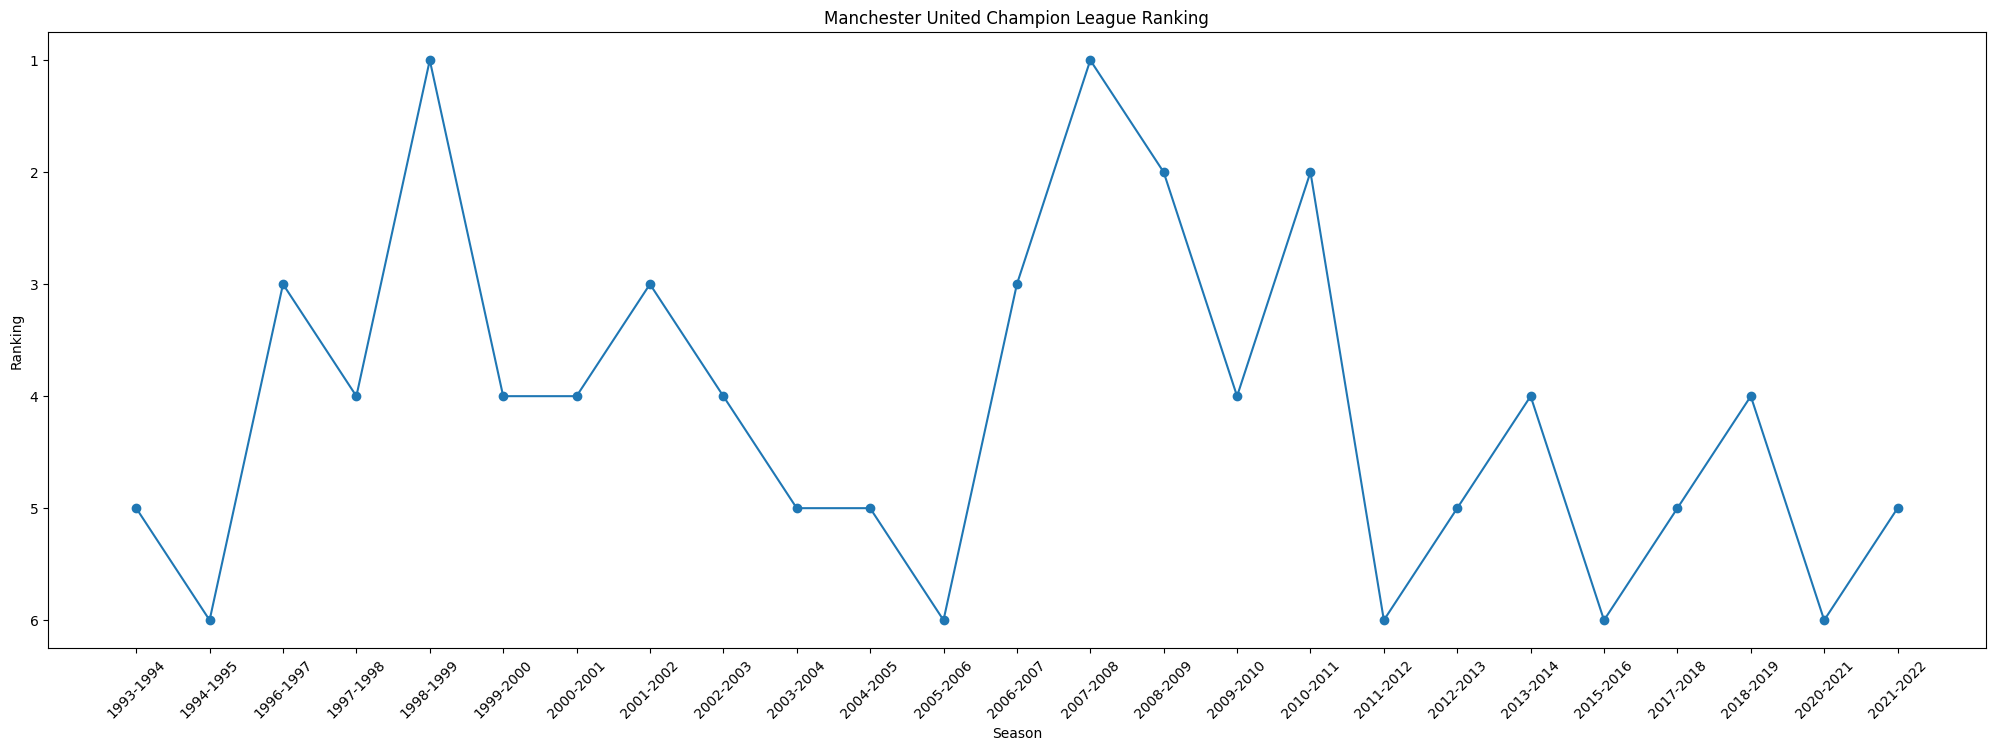

In [ ]:
import matplotlib.pyplot as plt

# Tạo biểu đồ đường để hiển thị thứ hạng
plt.plot(dfManU_C1['Season'], dfManU_C1['Rank_Number'], marker='o')

# Đảo ngược trục Y để giá trị thứ hạng hiển thị theo thứ tự từ cao đến thấp
plt.gca().invert_yaxis()

# Đặt tiêu đề và nhãn cho biểu đồ
plt.title('Manchester United Champion League Ranking')
plt.xlabel('Season')
plt.ylabel('Ranking')

# Xoay nhãn trục x để đọc dễ dàng hơn
plt.xticks(rotation=45)

#custom biểu đồ
fig = plt.gcf()
fig.set_size_inches(25, 8)
ax=plt.subplot()

# Hiển thị biểu đồ
plt.show()

Tìm ra người từng ghi bàn nhiều nhất trong mùa giải cho MU ở Champion League

In [ ]:
bestplayer = None
hisgoals = 0
for i in dfManU_C1['Top Team Scorer']:
  cutted = i.split('-')
  player = str(cutted[0]).strip()
  goal = int(cutted[1])
  if bestplayer == None and hisgoals ==0:
    bestplayer = player
    hisgoals = goal
  else:
    if goal <= hisgoals:
      continue
    else:
      bestplayer = player
      hisgoals = goal

print(f'Cầu thủ ghi được nhiều bàn nhất trong một mùa giải trong lịch sử MU ở Champion League là: {bestplayer} với số bàn thắng là: {hisgoals}')

Cầu thủ ghi được nhiều bàn nhất trong một mùa giải trong lịch sử MU ở Champion League là: Ruud van Nistelrooy với số bàn thắng là: 12


**Chọn ra năm mà MU vô địch C1 kể từ khi premier league ra đời**

In [ ]:
dfWin_C1 = dfManU_C1.loc[dfManU_C1['LgRank'] == 'W']
dfWin_C1

,Season,Squad,Comp,LgRank,MP,W,D,L,GF,GA,GD,Pts,Attendance,Top Team Scorer,Goalkeeper,Notes,Rank_Number
28,1998-1999,Manchester Utd,1. Champions Lg,W,13.0,6.0,7.0,0.0,31.0,16.0,15.0,25.0,NaN,Dwight Yorke - 8,NaN,NaN,1
19,2007-2008,Manchester Utd,1. Champions Lg,W,13.0,9.0,5.0,0.0,20.0,6.0,14.0,32.0,80699.0,Cristiano Ronaldo - 8,Edwin van der Sar,NaN,1


In [ ]:
#print(f'Số cúp Champion League mà MU có là: {dfWin_C1.value_counts()}')
#code trên lỗi ra 0 mà chả biết sao nên thôi đếm tay
count = len(dfWin_C1['Season'])
print(f'Số Cup C1 MU có là: {count}')

Số Cup C1 MU có là: 2
